# Project Name: MNIST Digit Classifier using TensorFlow

Welcome! This notebook walks through how to build and train a neural network to classify handwritten digits using TensorFlow.

We'll cover:
- Dataset intro (MNIST)
- Data preprocessing
- Model architecture
- Training, Evaluation, and Predictions
- Visualizations

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

## Dataset Overview

The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0-9), each 28x28 pixels.
- 60,000 for training
- 10,000 for testing

## Load and Preprocess Data

We normalize pixel values to [0, 1] and one-hot encode labels.

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Visualizing Sample Images from Dataset

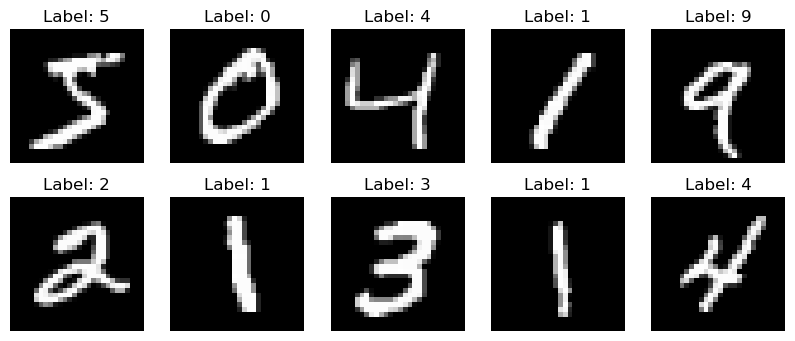

In [4]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

## Model Architecture

We use a simple feedforward neural network:
- Input: Flatten 28x28 → 784
- Hidden: Dense(128), ReLU
- Dropout(0.2)
- Output: Dense(10), Softmax

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

/opt/homebrew/Caskroom/miniconda/base/envs/home/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the Model

- Optimizer: Adam
- Loss: Categorical Crossentropy
- Metrics: Accuracy

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [7]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=5,
                    batch_size=64,
                    verbose=2)

Epoch 1/5
844/844 - 1s - 1ms/step - accuracy: 0.8961 - loss: 0.3605 - val_accuracy: 0.9577 - val_loss: 0.1536
Epoch 2/5
844/844 - 1s - 873us/step - accuracy: 0.9470 - loss: 0.1790 - val_accuracy: 0.9698 - val_loss: 0.1092
Epoch 3/5
844/844 - 1s - 995us/step - accuracy: 0.9606 - loss: 0.1330 - val_accuracy: 0.9738 - val_loss: 0.0954
Epoch 4/5
844/844 - 1s - 788us/step - accuracy: 0.9679 - loss: 0.1079 - val_accuracy: 0.9762 - val_loss: 0.0841
Epoch 5/5
844/844 - 1s - 727us/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9770 - val_loss: 0.0767


## Evaluate on Test Set

In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.9759 - loss: 0.0790
✅ Test Accuracy: 0.98


## Visualize Training Metrics

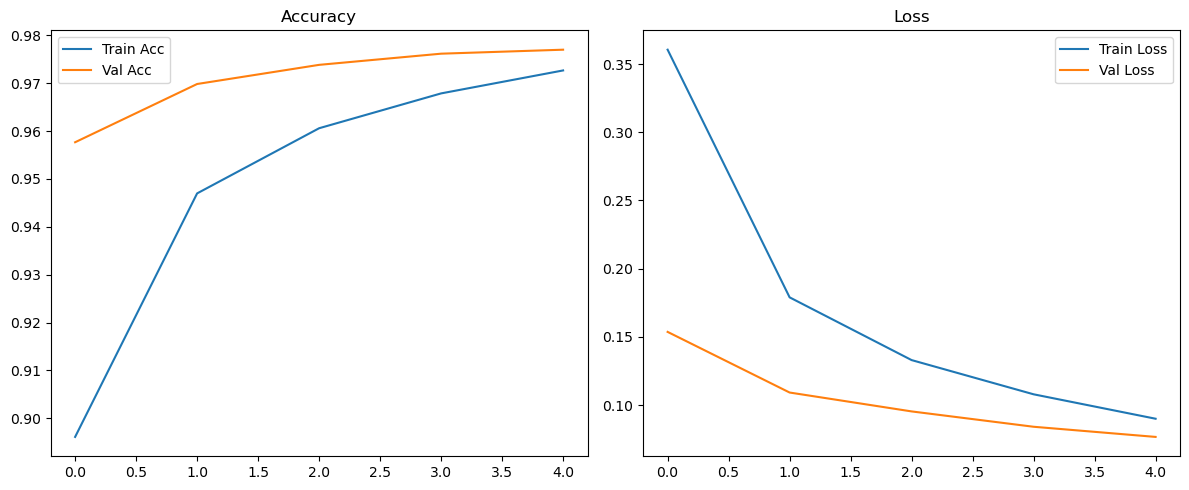

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.tight_layout()
plt.show()

## Predict and Visualize Model Output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


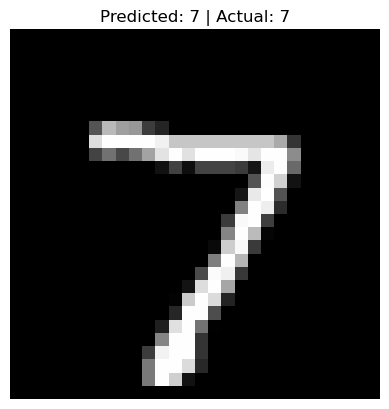

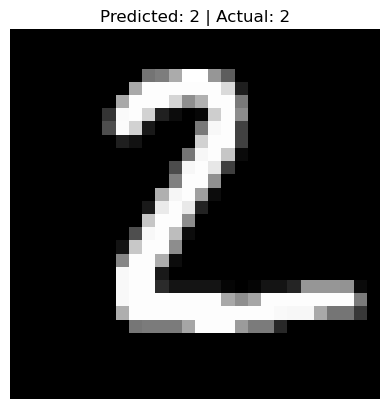

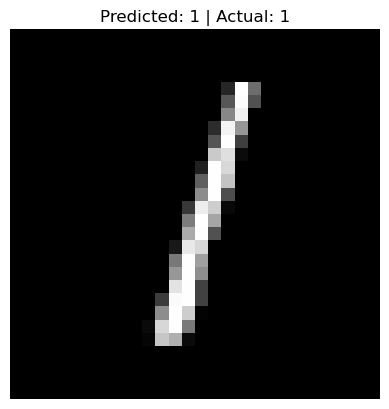

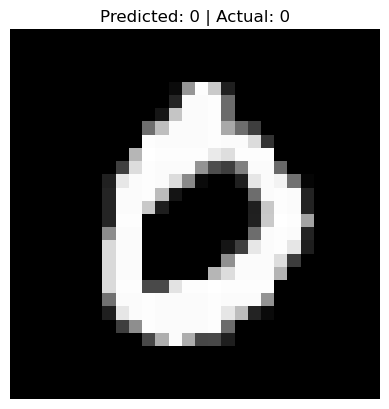

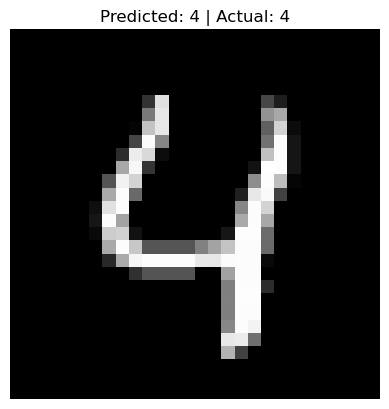

In [10]:
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]} | Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()

## Save the Trained Model

In [11]:
model.save("mnist_ann_model.h5")

## ✅ Summary

- Built a Neural Network using TensorFlow
- Trained on MNIST digits
- Visualized model performance and predictions

### ✅ What You Learned
- Data preprocessing
- Neural network layers and activation
- Loss and optimizer usage
- Evaluation and prediction

> You can now extend this model using CNNs!